In [11]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [12]:
#TO EXTRACT THE DATA FROM THE FILE
data = np.loadtxt('expdata.dat')
i = data[:,0]
di = data[:,1]
b_electron = data[:,2]
b_positron = data[:,3]
b_error = data[:,4]
counts_ps_electron = data[:,5]
counts_ps_positron = data[:,6]

In [13]:
def bfield (I, a, b):
	return a*I+b

In [14]:
#CALIBRATION OF THE MAGNETIC FIELD IN BOTH CASES OF ELECTRON AND POSITRON DECAY

popt_electron_field, pcov_electron_field = curve_fit(bfield, i, b_electron, p0=(100, 0), sigma = b_error)
print(popt_electron_field)
diag_pcov_electron_field = np.sqrt(np.diag(pcov_electron_field))
print(diag_pcov_electron_field)
print('======================')
popt_positron_field, pcov_positron_field = curve_fit(bfield, i, b_positron, p0=(100, 0), sigma = b_error)
print(popt_positron_field)
diag_pcov_positron_field = np.sqrt(np.diag(pcov_positron_field))
print(diag_pcov_positron_field)

[ 9.69962406e+01 -1.05263158e-03]
[1.04657314 1.25353708]
[97.20827068 -0.64368421]
[1.25652562 1.50521049]


In [15]:
def kinetic_energy (b):
	pc = 0.3 * 50 * b
	rest = 511
	return np.sqrt(pc**2 + rest**2) - rest

def kinetic_energy_error (b, db):
	rest = 511
	return 0.3**2 * b * db/np.sqrt(rest**2 + (0.3 * 50 * b)**2)

def beta (t):
	rest = 511
	return np.sqrt(1 - (rest/(t+rest))**2)

def f_el(t):
	z=40
	e = 1.44
	n = z*e/(197.3*beta(t))
	return 2*np.pi*n/(1-np.exp(-2*n*np.pi))

def f_pos(t):
	z =-10
	e = 1.44
	n = z*e/(197.3*beta(t))
	return 2*np.pi*n/(1-np.exp(-2*n*np.pi))

def distribution_el (t, c, tmax):
	rest=511
	return f_el(t)*c * (tmax-t)**2*np.sqrt((t+rest)**2 - rest**2)*(t+rest)

def distribution_pos (t, c, tmax):
	rest=511
	return f_pos(t)*c * (tmax-t)**2*np.sqrt((t+rest)**2 - rest**2)*(t+rest)

In [16]:
kinetic_electron = kinetic_energy(bfield(i, *popt_electron_field))
kinetic_electron_error = kinetic_energy_error(bfield(i, *popt_electron_field), bfield(i, *diag_pcov_electron_field))


kinetic_positron = kinetic_energy(bfield(i, *popt_positron_field))
kinetic_positron_error = kinetic_energy_error(bfield(i, *popt_positron_field), bfield(i, *diag_pcov_positron_field))

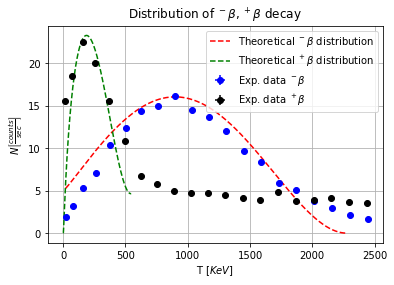

In [17]:
theor = np.linspace (20, 2274, 1000000)
plt.plot(theor, 0.000000000002*distribution_el(theor, 1, 2274), 'r--')
plt.errorbar(kinetic_electron, counts_ps_electron, counts_ps_electron*0, kinetic_electron_error, 'bo')
#plt.errorbar(kinetic_positron, counts_ps_positron, counts_ps_positron*0, kinetic_positron_error)

theor1 = np.linspace(0.001, 546, 10000)
plt.plot(theor1, (distribution_pos(theor1, 1, 546)*0.905 + distribution_pos(theor1, 1, 1820)*0.005)/(0.905+0.005)*0.0000000007, 'g--')
plt.errorbar(kinetic_positron, counts_ps_positron, counts_ps_positron*0, kinetic_positron_error, 'ko')
plt.legend([r'Theoretical $^-\beta$ distribution', r'Theoretical $^+\beta$ distribution', r'Exp. data $^-\beta$', r'Exp. data $^+\beta$'])
plt.grid()
plt.title(r'Distribution of $^-\beta, ^+\beta$ decay')
plt.ylabel(r'$N \left[\frac{counts}{sec}\right]$')
plt.xlabel(r'T $\left[ KeV\right]$')
plt.savefig('all.png', dpi=500)

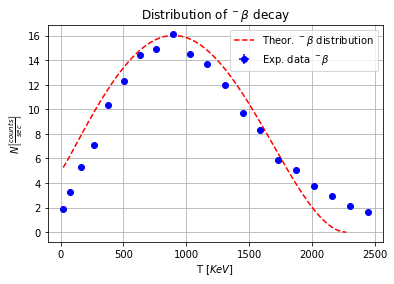

In [18]:
plt.plot(theor,0.000000000002* distribution_el(theor, 1, 2274), 'r--')
plt.errorbar(kinetic_electron, counts_ps_electron, counts_ps_electron*0, kinetic_electron_error, 'bo')
plt.grid()
plt.title(r'Distribution of $^-\beta$ decay')
plt.ylabel(r'$N \left[\frac{counts}{sec}\right]$')
plt.xlabel(r'T $\left[ KeV\right]$')
plt.legend([r'Theor. $^-\beta$ distribution', r'Exp. data $^-\beta$'])
plt.savefig('electron_distribution.png', dpi=500)

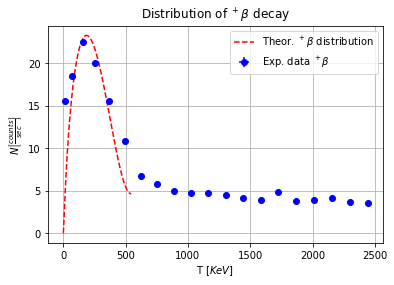

In [19]:
plt.plot(theor1, (distribution_pos(theor1, 1, 546)*0.905 + distribution_pos(theor1, 1, 1820)*0.005)/(0.905+0.005)*0.0000000007, 'r--')
plt.errorbar(kinetic_positron, counts_ps_positron, counts_ps_positron*0, kinetic_positron_error, 'bo')
plt.grid()
plt.title(r'Distribution of $^+\beta$ decay')
plt.ylabel(r'$N \left[\frac{counts}{sec}\right]$')
plt.xlabel(r'T $\left[ KeV\right]$')
plt.legend([r'Theor. $^+\beta$ distribution', r'Exp. data $^+\beta$'])
plt.savefig('positron_distribution.png', dpi=500)

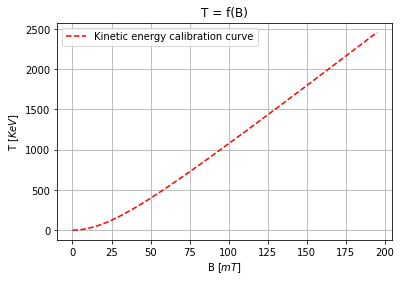

In [20]:
x = np.linspace (0, 195, 10000)
#plt.errorbar(bfield(i, *popt_electron_field), kinetic_electron, kinetic_electron_error, bfield(i, *diag_pcov_electron_field), 'bo')
plt.plot(x, kinetic_energy(x), 'r--')
plt.grid()
plt.title(r'T = f(B)')
plt.ylabel(r'T $\left[ KeV\right]$')
plt.xlabel(r'B $\left[ mT\right]$')
plt.legend(['Kinetic energy calibration curve'])
plt.savefig('energy_calibration.png', dpi=500)

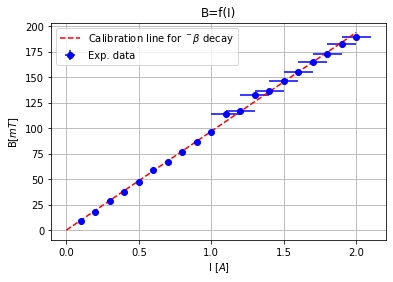

In [21]:
curr = np.linspace (0, 2, 100)
plt.plot(curr, bfield(curr, *popt_electron_field), 'r--')
plt.errorbar(i, b_electron, b_error, di, 'bo')
plt.grid()
plt.title(r'B=f(I)')
plt.ylabel(r'B$\left[ mT\right]$')
plt.xlabel(r'I $\left[ A \right]$')
plt.legend([r'Calibration line for $^-\beta$ decay', 'Exp. data'])
plt.savefig('b_electron_calibration.png', dpi=500)

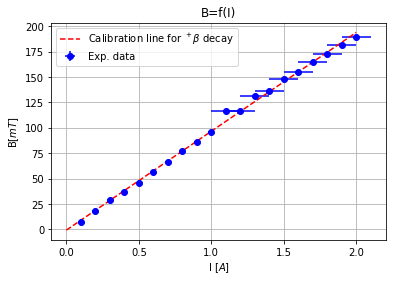

In [22]:
plt.plot(curr, bfield(curr, *popt_positron_field), 'r--')
plt.errorbar(i, b_positron, b_error, di, 'bo')
plt.grid()
plt.title(r'B=f(I)')
plt.ylabel(r'B$\left[ mT\right]$')
plt.xlabel(r'I $\left[ A \right]$')
plt.legend([r'Calibration line for $^+\beta$ decay', 'Exp. data'])
plt.savefig('b_positron_calibration.png', dpi=500)